# Visualization of Sea Surface Height

After setting up Anaconda and our Python environment, we plot sea surface height as a practice example. To this end, we use `scripy.io.netcdf` to read model data and `matplotlib.pyplot` to plot sea surface height.
Firstly, we use `%pylab inline` to embed plots into this document and import our desired `scripy` function.

In [4]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


We store the data in a variable (commonly called a handle) using the `scripy` function on the file path where our data is located. We can then check the variables within this data set by calling the `.variables` function on our handle.

In [7]:
prog_file = scipy.io.netcdf_file('../example_1degree_data/ocean.0001-0010.ssh.nc')
prog_file.variables

OrderedDict([('nv', <scipy.io.netcdf.netcdf_variable at 0x10e0b9ad0>),
             ('ssh', <scipy.io.netcdf.netcdf_variable at 0x10e0b9b10>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x10e0b9b50>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x10e0b9b90>),
             ('xh', <scipy.io.netcdf.netcdf_variable at 0x10e0b9c10>),
             ('yh', <scipy.io.netcdf.netcdf_variable at 0x10e0b9950>),
             ('average_T1', <scipy.io.netcdf.netcdf_variable at 0x10e0b9e10>),
             ('average_T2', <scipy.io.netcdf.netcdf_variable at 0x10e0dc090>),
             ('average_DT', <scipy.io.netcdf.netcdf_variable at 0x10e0dc190>)])

We are specifically interested in the `ssh` variable (sea surface height), so we create an appropriate handle to store this data. We can find a general description and the shape (i.e. dimensions) of this variable by calling two functions: `.long_name` and `.shape`.

In [8]:
ssh_handle = prog_file.variables['ssh']
print('Description =', ssh_handle.long_name)
print('Shape =',ssh_handle.shape)

('Description =', 'Sea Surface Height')
('Shape =', (10, 320, 360))


We find that our handle does in fact contain data for sea surface height and that the data is in a 3 dimensional array. Examining the corresponding .cdl file (which can be opened in any generic text editor), we find that the dimensions of this array correspond to `time`, `yh` (h point nominal latitude) and `xh` (h point nominal longitude).
To plot, we call upon `plt.pcolormesh`, but because we want to plot only over the `(yh,xh)`'s, we must specify a time. We set this to `time = 0`.

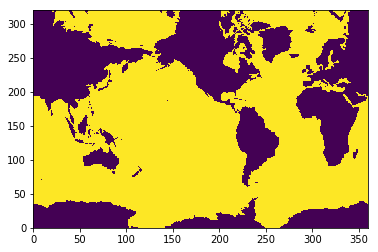

In [9]:
plt.pcolormesh(ssh_handle[0])

This is a good start, but we want to remove the "<matplotlib...>" line that is outputed and add a scale. We do each of these by, respectively, adding a semicolon after our command and utilizing the `plt.colorbar()` command. 

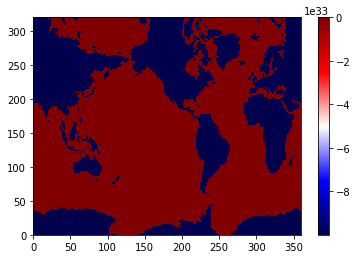

In [10]:
plt.pcolormesh(ssh_handle[0], cmap=cm.seismic); plt.colorbar();

The color scheme change is due to the `cmap=cm.seismic` command. However, this plot only captures 2 out of the 3 indices. We plot over time by defining our own function. But first, we import `ipywidgets`, a library that will make our plot interactive, and find a more approprate range.

In [11]:
import ipywidgets
[ssh_handle[0].min(), ssh_handle[0].max()]

[-1e+34, 1.1518394]

We find that the minimum value for sea surface height is a very large negative number. By examining the .cdl file, we can see that this value (-1e34) is the missing value used for when sea surface height data is absent (in this example, for points where there is land). This is why the previous plot is represented in binary colors--the automatic scaling of the plotting function is using this very large negative value.
To resolve this issue, we apply a "mask" to our data; that is, we create an array where we apply a `FALSE` value (rather than a numerical value) to points where data is missing so that our plotting function can appropriately handle these points (the function will simply not color there). Specifically, we define a function that takes the original `ssh_handle` array and a specific time (`record`) as inputs to output the masked array at that time slice.

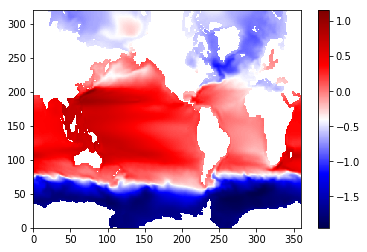

In [12]:
def ssh_ma_handle(original_array, record):
    return numpy.ma.array(original_array[record], mask = original_array[record] == original_array.missing_value)

plt.pcolormesh(ssh_ma_handle(ssh_handle, 0), cmap=cm.seismic); plt.colorbar();

We check the upper and lower bounds again, and see that our range is much more reasonable for our masked data. Next, we create a function that will call all the plotting functions of interest (creates plot, sets scale and displays scale) given a specific time/`record` to slice at.

In [13]:
[ssh_ma_handle(ssh_handle, 0).min(), ssh_ma_handle(ssh_handle, 0).max()]

[-1.9465954, 1.1518394]

In [14]:
def plot_ssh(record):
    plt.pcolormesh(ssh_ma_handle(ssh_handle, record), cmap=cm.spectral)
    plt.clim(-1.9, 1.1) #Fixed scale here
    plt.colorbar()

We use a loop to redraw our plot over time.

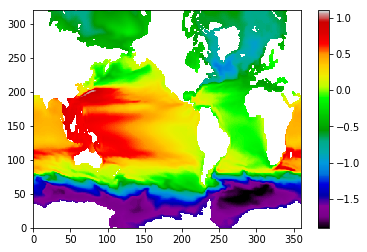

In [15]:
from IPython import display
for n in range(ssh_handle.shape[0]):
    display.display(plt.gcf())
    plt.clf()
    plot_ssh(n)
    display.clear_output(wait=True)